In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
#canceling the limitation in order to see all the columns
pd.set_option('display.max_columns', None)

In [3]:
df_answers = pd.read_csv('Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')
df_weather = pd.read_excel('cleaned_weather_data2.xlsx')

In [4]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_weather.head()

,BASEL_humidity,BASEL_pressure,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,DEBILT_humidity,DEBILT_pressure,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,KASSEL_humidity,KASSEL_pressure,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MADRID_humidity,MADRID_pressure,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,OSLO_humidity,OSLO_pressure,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean
0,0.85,1.018,0.09,0.7,6.5,0.81,1.0195,0.00,7.0,3.7,0.67,1.017,0.01,2.3,2.4,0.85,1.0032,0.25,0.0,9.3,0.83,1.0161,0.08,0.0,10.0,0.91,1.0010,0.22,0.0,10.6,0.82,1.0094,0.48,1.6,7.9,1.00,1.0173,0.00,0.0,-0.6,0.83,1.0063,0.32,1.0,9.5,0.92,1.0260,0.0,1.4,7.6,0.67,0.10,0.0,6.9,0.98,0.9978,1.14,0.0,4.9,0.73,1.0304,0.010000,2.3,-5.9,1.0114,0.320000,0.0,4.2,0.88,1.0003,0.34,4.7,8.5
1,0.84,1.018,1.05,1.1,6.1,0.84,1.0172,0.00,0.0,2.9,0.67,1.017,0.31,0.0,2.3,0.90,1.0056,0.06,0.1,7.7,0.89,1.0161,0.66,0.5,8.2,0.98,1.0051,0.23,0.0,6.1,0.86,1.0086,0.27,0.0,7.7,0.94,1.0173,0.13,3.2,2.1,0.92,1.0062,1.34,0.4,8.6,0.86,1.0254,0.0,0.9,9.8,0.72,0.30,5.1,6.2,0.62,1.0139,0.00,0.0,3.4,0.97,1.0292,0.610000,0.0,-9.5,1.0114,0.060000,0.0,4.0,0.91,1.0007,0.84,0.7,8.9
2,0.90,1.018,0.30,0.0,8.5,0.77,1.0179,0.00,3.5,3.1,0.67,1.017,0.00,0.6,2.7,0.92,1.0165,0.01,3.0,6.8,0.95,1.0161,0.07,0.0,7.1,0.96,1.0166,0.07,0.1,8.4,0.91,1.0129,0.60,0.0,6.5,0.96,1.0173,0.12,0.0,4.6,0.97,1.0167,0.46,0.0,6.9,0.90,1.0287,0.0,2.3,8.6,0.91,0.30,0.0,5.8,0.69,1.0234,0.08,0.0,1.9,0.93,1.0320,0.476219,0.0,-9.5,1.0114,0.020000,0.0,2.4,0.91,1.0096,0.08,0.1,10.5
3,0.92,1.018,0.00,4.1,6.3,0.93,1.0268,0.00,0.0,2.0,0.67,1.017,0.00,0.0,2.0,0.95,1.0265,0.09,0.0,6.7,0.86,1.0161,0.02,0.0,6.8,0.98,1.0230,0.00,0.0,9.4,0.87,1.0290,0.00,0.0,5.8,0.94,1.0173,0.00,2.2,3.2,0.89,1.0277,0.00,0.3,7.0,0.75,1.0281,0.0,8.7,10.3,0.90,0.01,0.0,3.9,0.98,1.0244,0.35,0.0,3.0,0.93,1.0443,1.100000,0.0,-11.5,1.0114,0.000000,0.0,1.2,0.86,1.0184,0.98,0.0,7.4
4,0.95,1.018,0.14,5.4,3.0,0.99,1.0286,0.06,0.0,2.0,0.67,1.017,0.00,0.0,2.5,0.90,1.0243,0.39,0.0,8.0,0.92,1.0161,0.62,0.0,7.7,0.84,1.0275,0.00,2.1,8.9,0.86,1.0262,0.71,0.0,5.4,0.94,1.0173,0.00,0.0,3.6,0.92,1.0259,0.56,0.0,8.1,0.64,1.0269,0.0,7.8,12.1,0.85,0.96,5.6,1.8,0.96,1.0092,0.26,0.0,3.7,0.75,1.0430,0.010000,6.1,-9.3,1.0114,0.149542,0.0,3.3,0.80,1.0328,0.00,5.7,5.7


In [6]:
#Making sure the cities in answers correspond to the cities in df_weather
answers_columns = df_answers.columns.to_list()
weather_columns = df_weather.columns.to_list()
answer_stations = [col.split('_')[0] for col in answers_columns if '_' in col ]
weather_stations = [col for col in weather_columns if col.split('_')[0] in answer_stations]
df_weather = df_weather[weather_stations]
df_weather.head()

,BASEL_humidity,BASEL_pressure,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,DEBILT_humidity,DEBILT_pressure,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,KASSEL_humidity,KASSEL_pressure,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MADRID_humidity,MADRID_pressure,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,OSLO_humidity,OSLO_pressure,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean
0,0.85,1.018,0.09,0.7,6.5,0.81,1.0195,0.00,7.0,3.7,0.67,1.017,0.01,2.3,2.4,0.85,1.0032,0.25,0.0,9.3,0.83,1.0161,0.08,0.0,10.0,0.91,1.0010,0.22,0.0,10.6,0.82,1.0094,0.48,1.6,7.9,1.00,1.0173,0.00,0.0,-0.6,0.83,1.0063,0.32,1.0,9.5,0.92,1.0260,0.0,1.4,7.6,0.67,0.10,0.0,6.9,0.98,0.9978,1.14,0.0,4.9,0.73,1.0304,0.010000,2.3,-5.9,1.0114,0.320000,0.0,4.2,0.88,1.0003,0.34,4.7,8.5
1,0.84,1.018,1.05,1.1,6.1,0.84,1.0172,0.00,0.0,2.9,0.67,1.017,0.31,0.0,2.3,0.90,1.0056,0.06,0.1,7.7,0.89,1.0161,0.66,0.5,8.2,0.98,1.0051,0.23,0.0,6.1,0.86,1.0086,0.27,0.0,7.7,0.94,1.0173,0.13,3.2,2.1,0.92,1.0062,1.34,0.4,8.6,0.86,1.0254,0.0,0.9,9.8,0.72,0.30,5.1,6.2,0.62,1.0139,0.00,0.0,3.4,0.97,1.0292,0.610000,0.0,-9.5,1.0114,0.060000,0.0,4.0,0.91,1.0007,0.84,0.7,8.9
2,0.90,1.018,0.30,0.0,8.5,0.77,1.0179,0.00,3.5,3.1,0.67,1.017,0.00,0.6,2.7,0.92,1.0165,0.01,3.0,6.8,0.95,1.0161,0.07,0.0,7.1,0.96,1.0166,0.07,0.1,8.4,0.91,1.0129,0.60,0.0,6.5,0.96,1.0173,0.12,0.0,4.6,0.97,1.0167,0.46,0.0,6.9,0.90,1.0287,0.0,2.3,8.6,0.91,0.30,0.0,5.8,0.69,1.0234,0.08,0.0,1.9,0.93,1.0320,0.476219,0.0,-9.5,1.0114,0.020000,0.0,2.4,0.91,1.0096,0.08,0.1,10.5
3,0.92,1.018,0.00,4.1,6.3,0.93,1.0268,0.00,0.0,2.0,0.67,1.017,0.00,0.0,2.0,0.95,1.0265,0.09,0.0,6.7,0.86,1.0161,0.02,0.0,6.8,0.98,1.0230,0.00,0.0,9.4,0.87,1.0290,0.00,0.0,5.8,0.94,1.0173,0.00,2.2,3.2,0.89,1.0277,0.00,0.3,7.0,0.75,1.0281,0.0,8.7,10.3,0.90,0.01,0.0,3.9,0.98,1.0244,0.35,0.0,3.0,0.93,1.0443,1.100000,0.0,-11.5,1.0114,0.000000,0.0,1.2,0.86,1.0184,0.98,0.0,7.4
4,0.95,1.018,0.14,5.4,3.0,0.99,1.0286,0.06,0.0,2.0,0.67,1.017,0.00,0.0,2.5,0.90,1.0243,0.39,0.0,8.0,0.92,1.0161,0.62,0.0,7.7,0.84,1.0275,0.00,2.1,8.9,0.86,1.0262,0.71,0.0,5.4,0.94,1.0173,0.00,0.0,3.6,0.92,1.0259,0.56,0.0,8.1,0.64,1.0269,0.0,7.8,12.1,0.85,0.96,5.6,1.8,0.96,1.0092,0.26,0.0,3.7,0.75,1.0430,0.010000,6.1,-9.3,1.0114,0.149542,0.0,3.3,0.80,1.0328,0.00,5.7,5.7


In [7]:
#dropping DATE column
df_answers = df_answers.drop(columns='DATE')
df_answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
scaler = StandardScaler()

In [9]:
# Scalng df_weather
columns = df_weather.columns.tolist()
df_scaled_weather = pd.DataFrame(scaler.fit_transform(df_weather), columns=columns)
df_scaled_weather.head()

,BASEL_humidity,BASEL_pressure,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,DEBILT_humidity,DEBILT_pressure,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,KASSEL_humidity,KASSEL_pressure,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MADRID_humidity,MADRID_pressure,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,OSLO_humidity,OSLO_pressure,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean
0,0.828178,-0.017886,-0.245455,-0.902918,-0.536739,0.905641,0.333135,-0.449344,0.283983,-1.018026,-0.019888,0.007521,-0.383182,-0.773378,-1.099956,0.343497,-1.285671,0.225364,-1.077312,-0.119662,0.627082,-0.026866,-0.298065,-1.014908,-0.109446,1.339614,-1.439298,0.394420,-1.064721,-0.106777,0.445250,-0.849681,1.356620,-0.647692,-0.191279,1.874912,-0.014975,-0.467368,-1.149211,-1.372069,0.255540,-1.089689,0.534111,-0.810834,-0.102962,1.887115,1.260995,-0.364569,-1.521762,-0.988280,-0.762475,-0.278930,-1.098059,-0.272202,1.547386,-1.190818,3.066166,-1.023256,-0.188730,-0.832133,-0.146284,-0.704260,-0.550327,-0.131817,-0.054567,0.967161,-1.013295,-0.396147,0.775349,-1.400173,-0.077394,0.442216,-0.684401
1,0.736947,-0.017886,2.807575,-0.810126,-0.591447,1.119798,0.018713,-0.449344,-1.333204,-1.108883,-0.019888,0.007521,0.911327,-1.344065,-1.111725,0.890019,-1.033746,-0.384741,-1.052820,-0.374763,1.159804,-0.026866,1.754492,-0.893696,-0.375967,2.018335,-1.034363,0.436393,-1.064721,-0.895065,0.826755,-0.949575,0.482661,-1.075217,-0.221125,1.406049,-0.014975,-0.242130,-0.420517,-1.044925,1.092387,-1.100750,4.043373,-0.958969,-0.239209,1.548493,1.173178,-0.364569,-1.642337,-0.691740,-0.355618,0.269676,0.043394,-0.360817,-0.717343,0.182408,-0.523702,-1.023256,-0.371233,0.761503,-0.294243,0.330551,-1.073269,-0.663743,-0.054567,-0.239203,-1.013295,-0.421154,1.220178,-1.360860,0.937510,-0.847371,-0.561989
2,1.284329,-0.017886,0.422396,-1.065304,-0.263202,0.620099,0.114406,-0.449344,-0.524611,-1.086169,-0.019888,0.007521,-0.426332,-1.195190,-1.064650,1.108627,0.110418,-0.545295,-0.342557,-0.518257,1.692526,-0.026866,-0.333454,-1.014908,-0.538841,1.824414,0.101433,-0.235182,-1.039671,-0.492163,1.303635,-0.412649,1.856025,-1.075217,-0.400198,1.562337,-0.014975,-0.259456,-1.149211,-0.742013,1.557301,0.060652,1.015774,-1.057726,-0.496563,1.774241,1.656169,-0.364569,-1.304726,-0.853490,1.190437,0.269676,-1.098059,-0.411455,-0.276979,0.992696,-0.271782,-1.023256,-0.553737,0.495897,0.050994,0.099821,-1.073269,-0.663743,-0.054567,-0.424798,-1.013295,-0.621207,1.220178,-0.486154,-0.605145,-1.040809,-0.072341
3,1.466790,-0.017886,-0.531676,-0.114186,-0.564093,1.762268,1.331084,-0.449344,-1.333204,-1.211098,-0.019888,0.007521,-0.426332,-1.344065,-1.147031,1.436540,1.160109,-0.288409,-1.077312,-0.534201,0.893443,-0.026866,-0.510399,-1.014908,-0.583262,2.018335,0.733528,-0.528996,-1.064721,-0.316988,0.922131,1.597700,-0.641000,-1.075217,-0.504657,1.406049,-0.014975,-0.467368,-0.648234,-0.911644,0.813438,1.277360,-0.566834,-0.983659,-0.481425,0.927685,1.568353,-0.364569,0.238641,-0.624345,1.109066,-0.52580

# Scaled Data vs Not Scaled data

In [10]:
X = df_weather
y = df_answers

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
scaler = StandardScaler()

In [13]:
#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [14]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

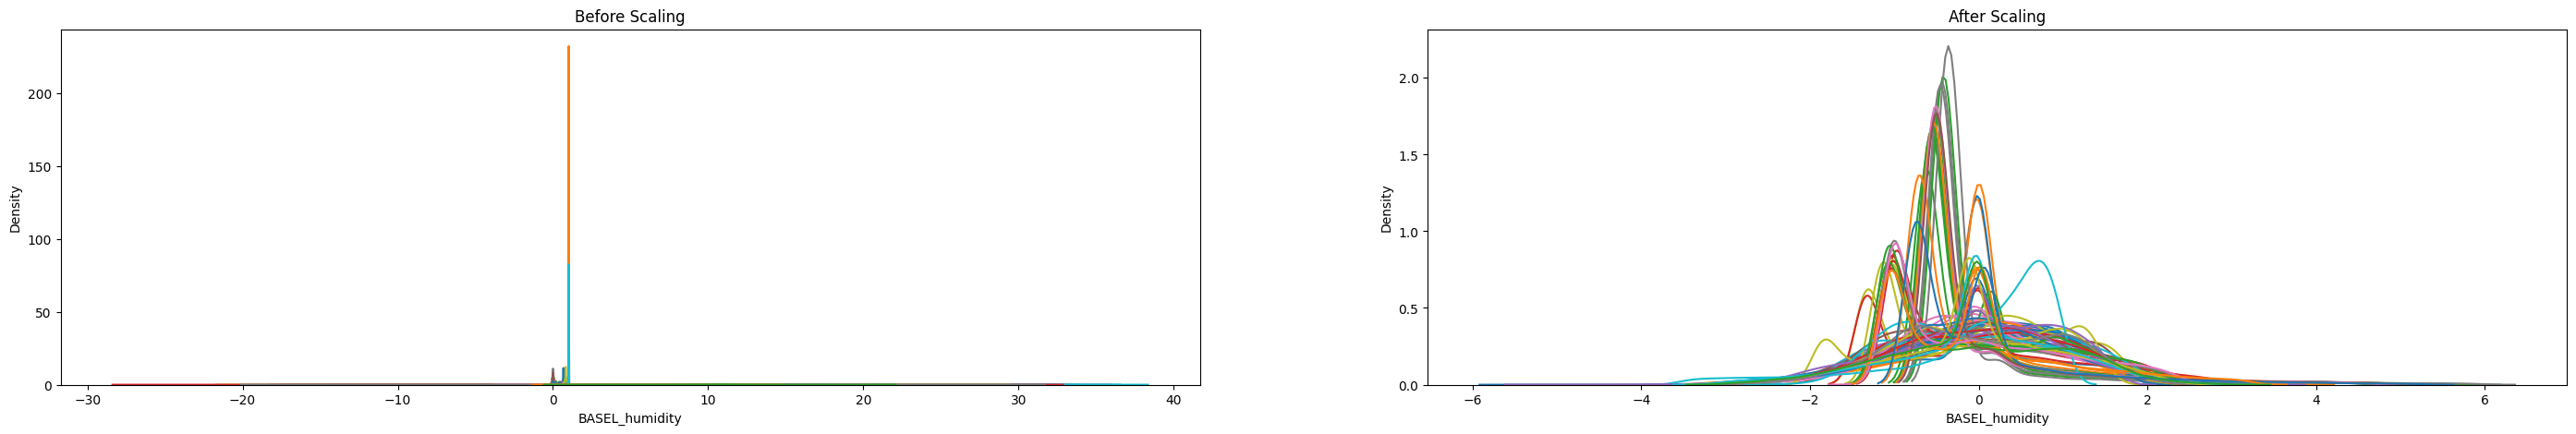

In [15]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(35, 5))
ax1.set_title('Before Scaling')
for c in X_train_df.columns:
    sns.kdeplot(X_train[c], ax=ax1)


ax2.set_title('After Scaling')
for c in X_train.columns:
    sns.kdeplot(X_train_df[c], ax = ax2)

plt.show()

.

Comment: We can see that after scaling, all features have a consistent scale and their value are within similar range. All features have a mean of zero and standard deviation of one. Using scaled data will lead to quicker convergence, stable training process and better generalization performance of ANN model. 

.

# Applying ANN for all cities

In [16]:
#Getting the list of cities
column_names = df_weather.columns.to_numpy()
split_column_names = [name.split('_', 1) for name in column_names]
first_elements = np.array([item[0] if len(item) > 1 else None for item in split_column_names])
cities = list(set(first_elements))
cities

['OSLO',
 'MUNCHENB',
 'BASEL',
 'STOCKHOLM',
 'MADRID',
 'HEATHROW',
 'BUDAPEST',
 'SONNBLICK',
 'MAASTRICHT',
 'KASSEL',
 'LJUBLJANA',
 'VALENTIA',
 'BELGRADE',
 'DEBILT',
 'DUSSELDORF']


Layer Configuration: [100, 30, 10]
OSLO - Training Accuracy: 0.99, Testing Accuracy: 0.99
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.98, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.99, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.99
LJUBLJANA - Training Accuracy: 0.98, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.98, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.98
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.99, Testing Accuracy: 0.98


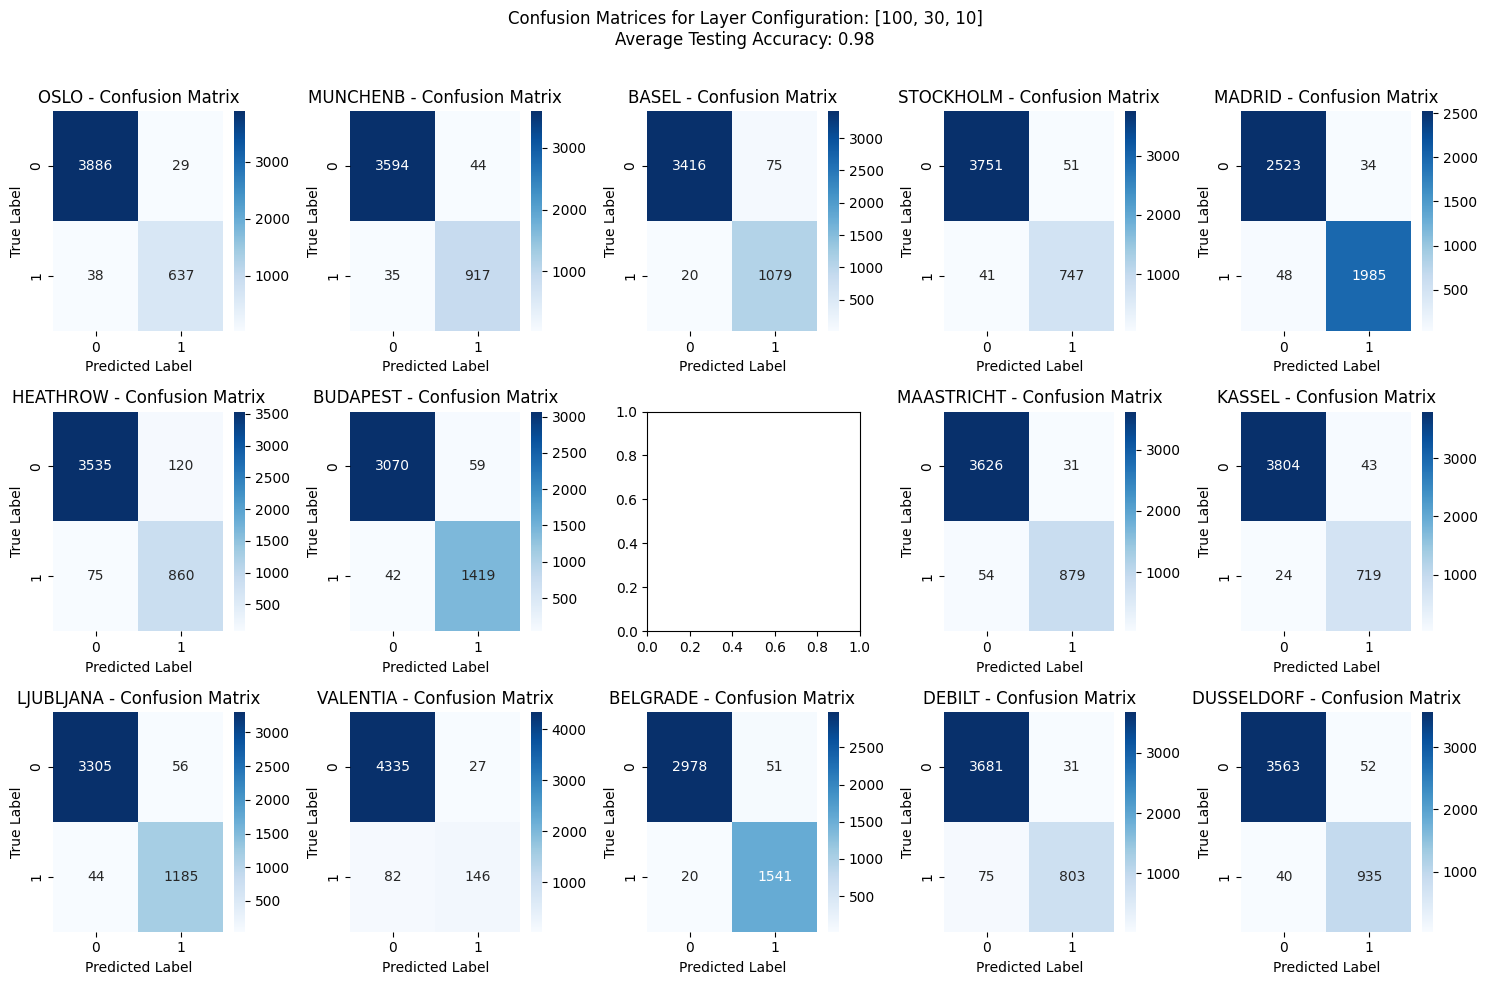


Layer Configuration: [80, 40, 10]
OSLO - Training Accuracy: 0.99, Testing Accuracy: 0.99
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.98, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.99, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.98
LJUBLJANA - Training Accuracy: 0.99, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.98, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.98
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.99, Testing Accuracy: 0.98


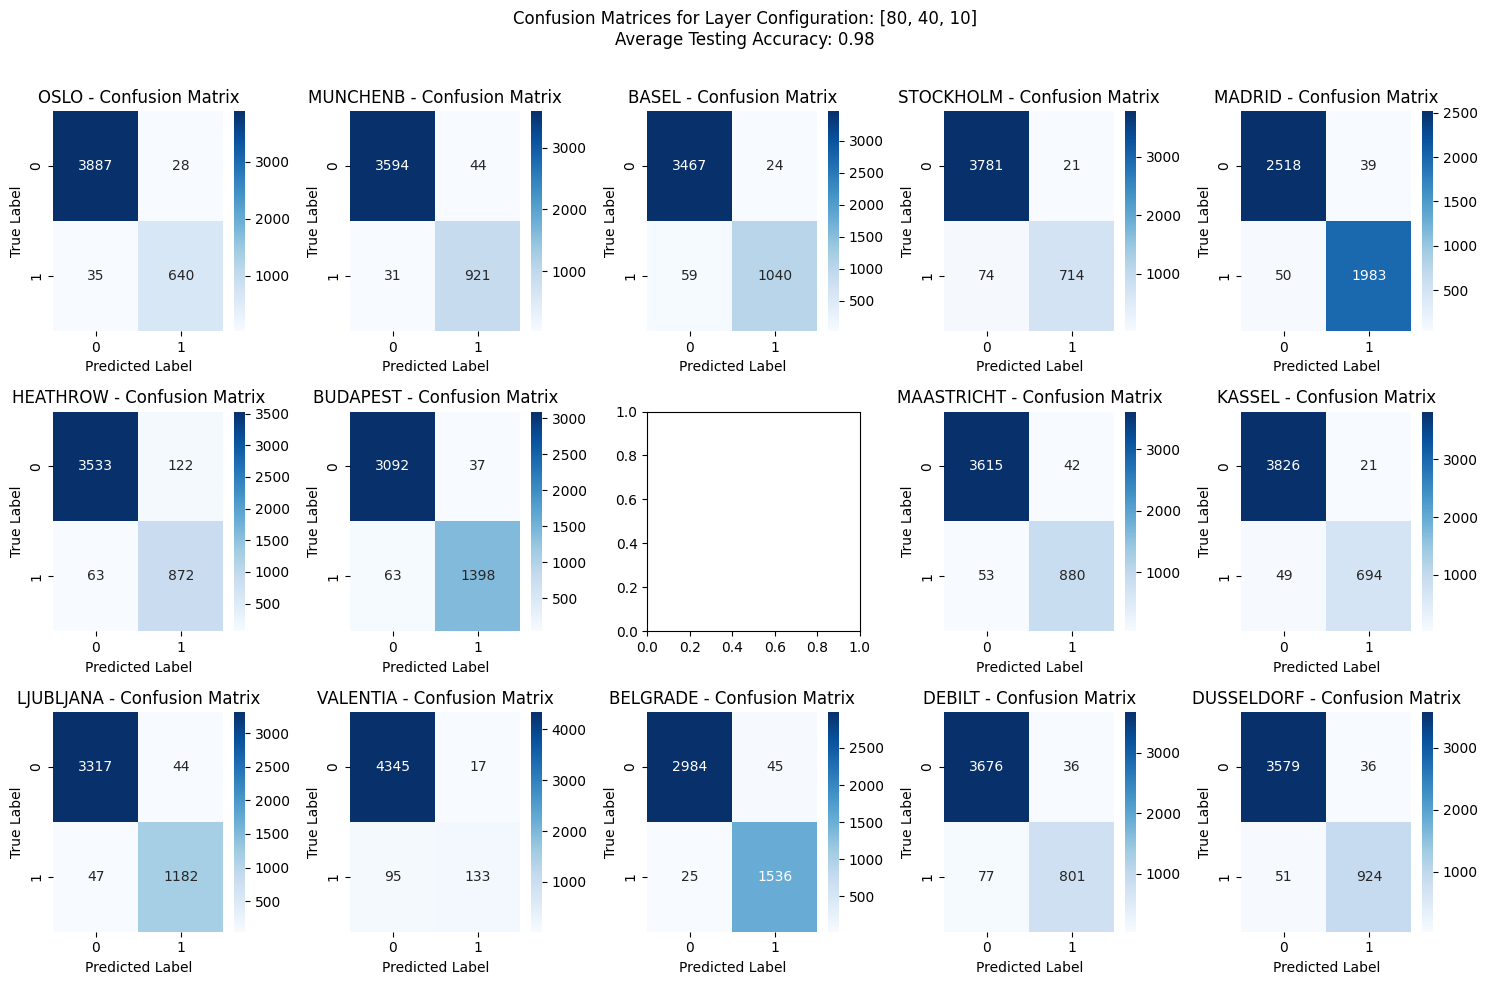


Layer Configuration: [100, 40, 20, 10]
OSLO - Training Accuracy: 0.99, Testing Accuracy: 0.99
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.99, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.97
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.98, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.98, Testing Accuracy: 0.98
LJUBLJANA - Training Accuracy: 0.99, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.98, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.98
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.98, Testing Accuracy: 0.98


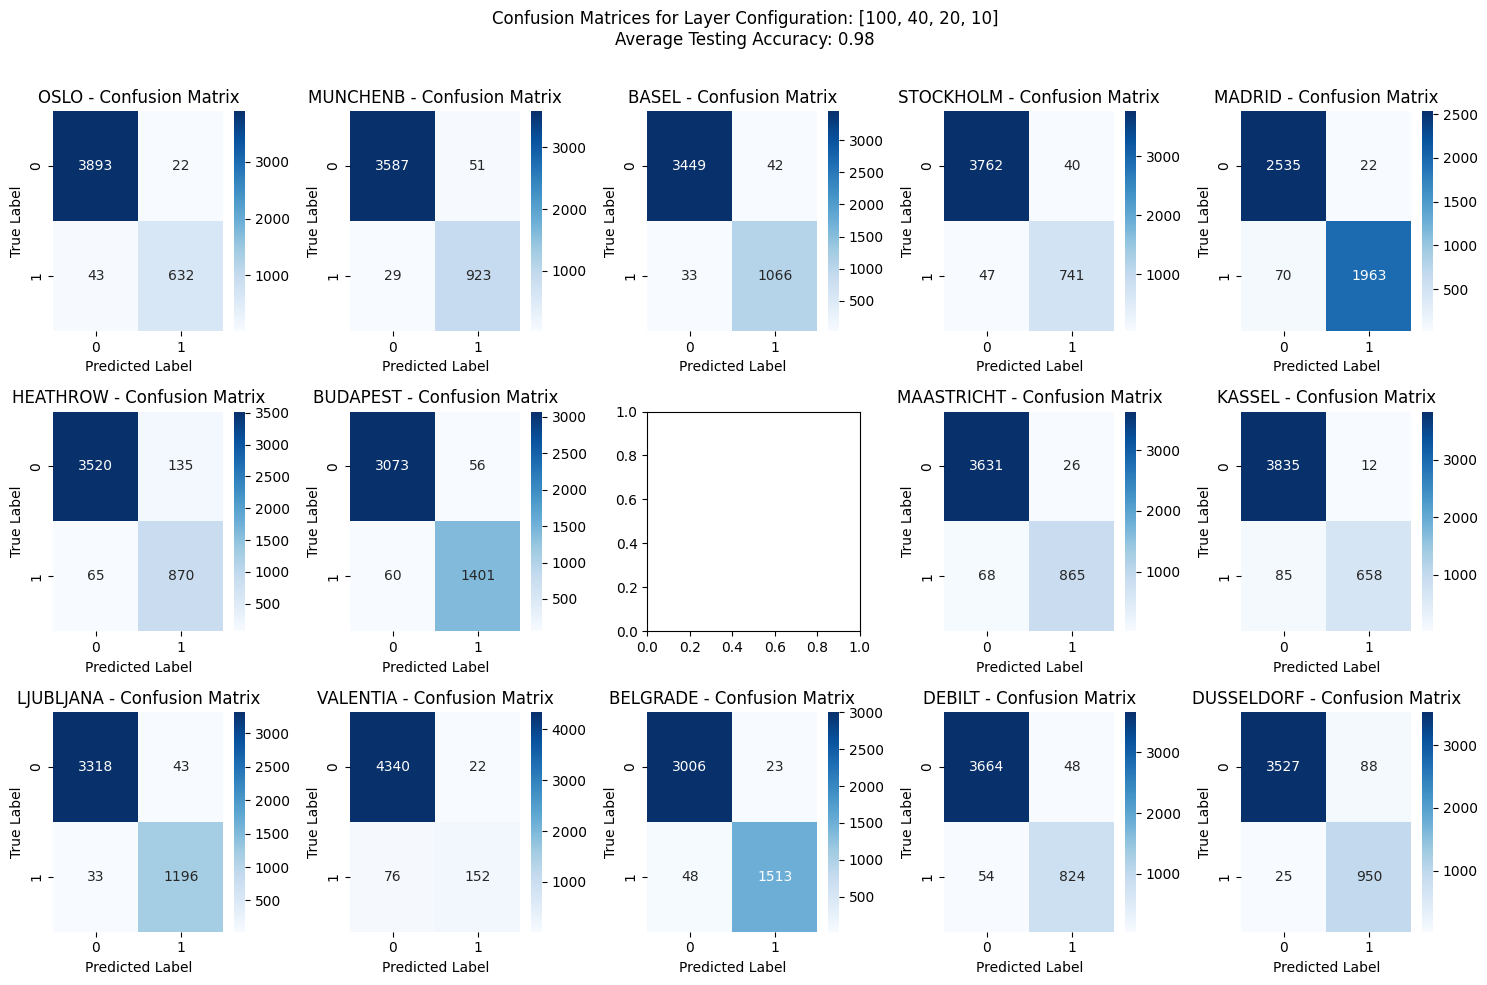


Layer Configuration: [100, 60, 40, 20, 5]
OSLO - Training Accuracy: 0.98, Testing Accuracy: 0.98
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.99, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.99, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.99
LJUBLJANA - Training Accuracy: 0.95, Testing Accuracy: 0.96
VALENTIA - Training Accuracy: 0.97, Testing Accuracy: 0.97
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.99
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.98, Testing Accuracy: 0.98


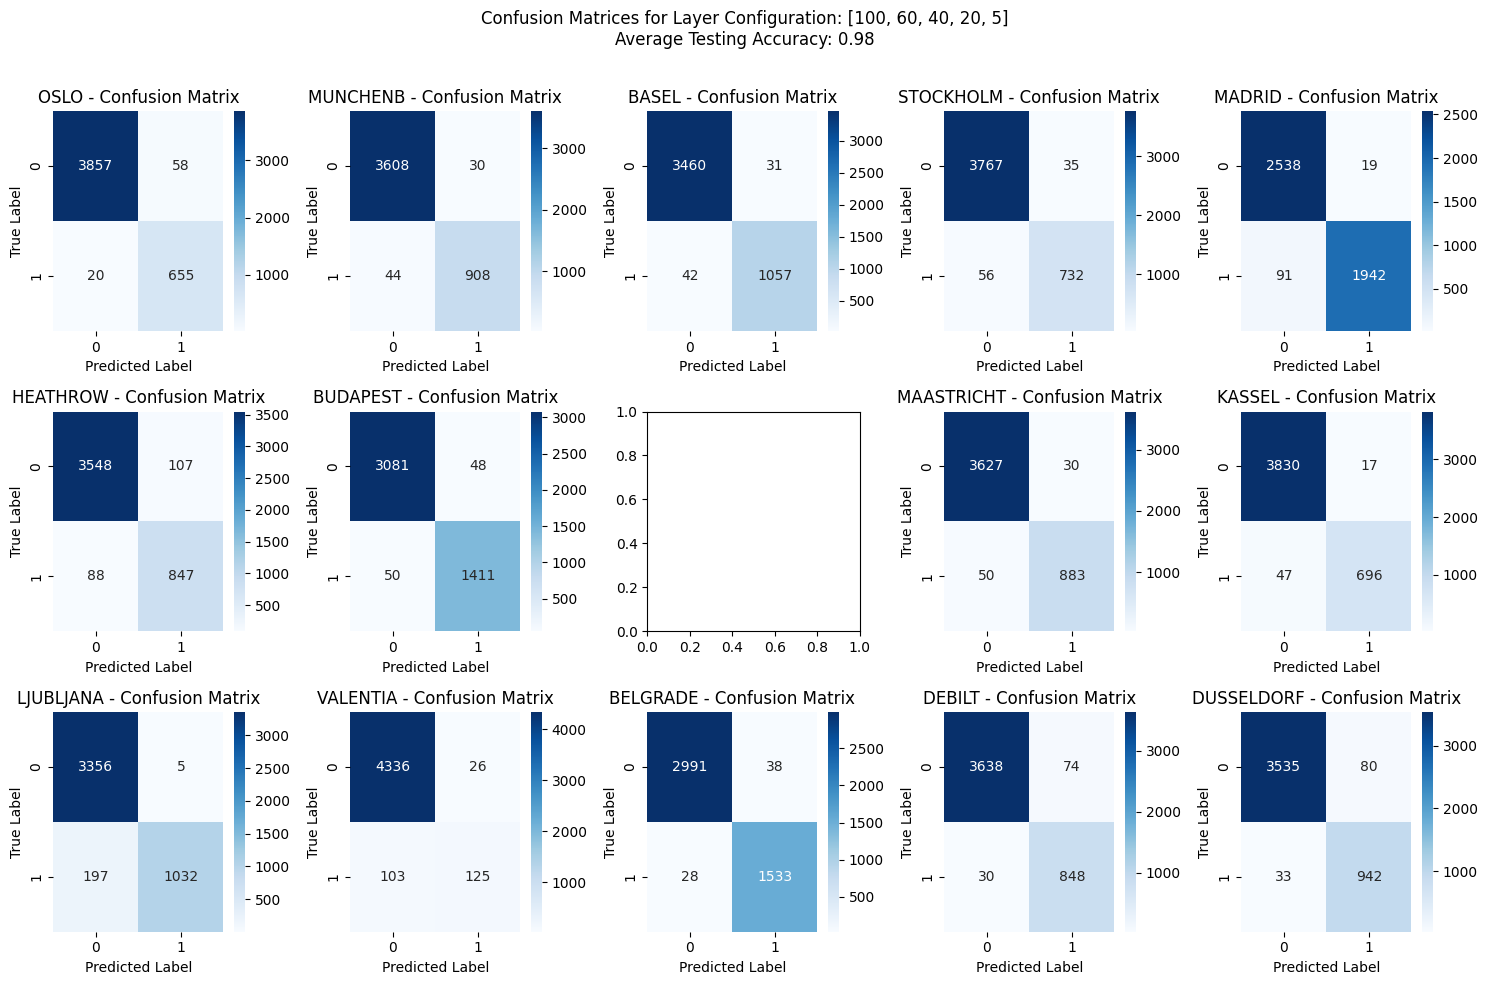


Layer Configuration: [80, 40, 20, 10, 5]
OSLO - Training Accuracy: 0.99, Testing Accuracy: 0.99
MUNCHENB - Training Accuracy: 0.96, Testing Accuracy: 0.96
BASEL - Training Accuracy: 0.98, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.95
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.98, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.99
LJUBLJANA - Training Accuracy: 0.98, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.95, Testing Accuracy: 0.95
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.98
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.98, Testing Accuracy: 0.98


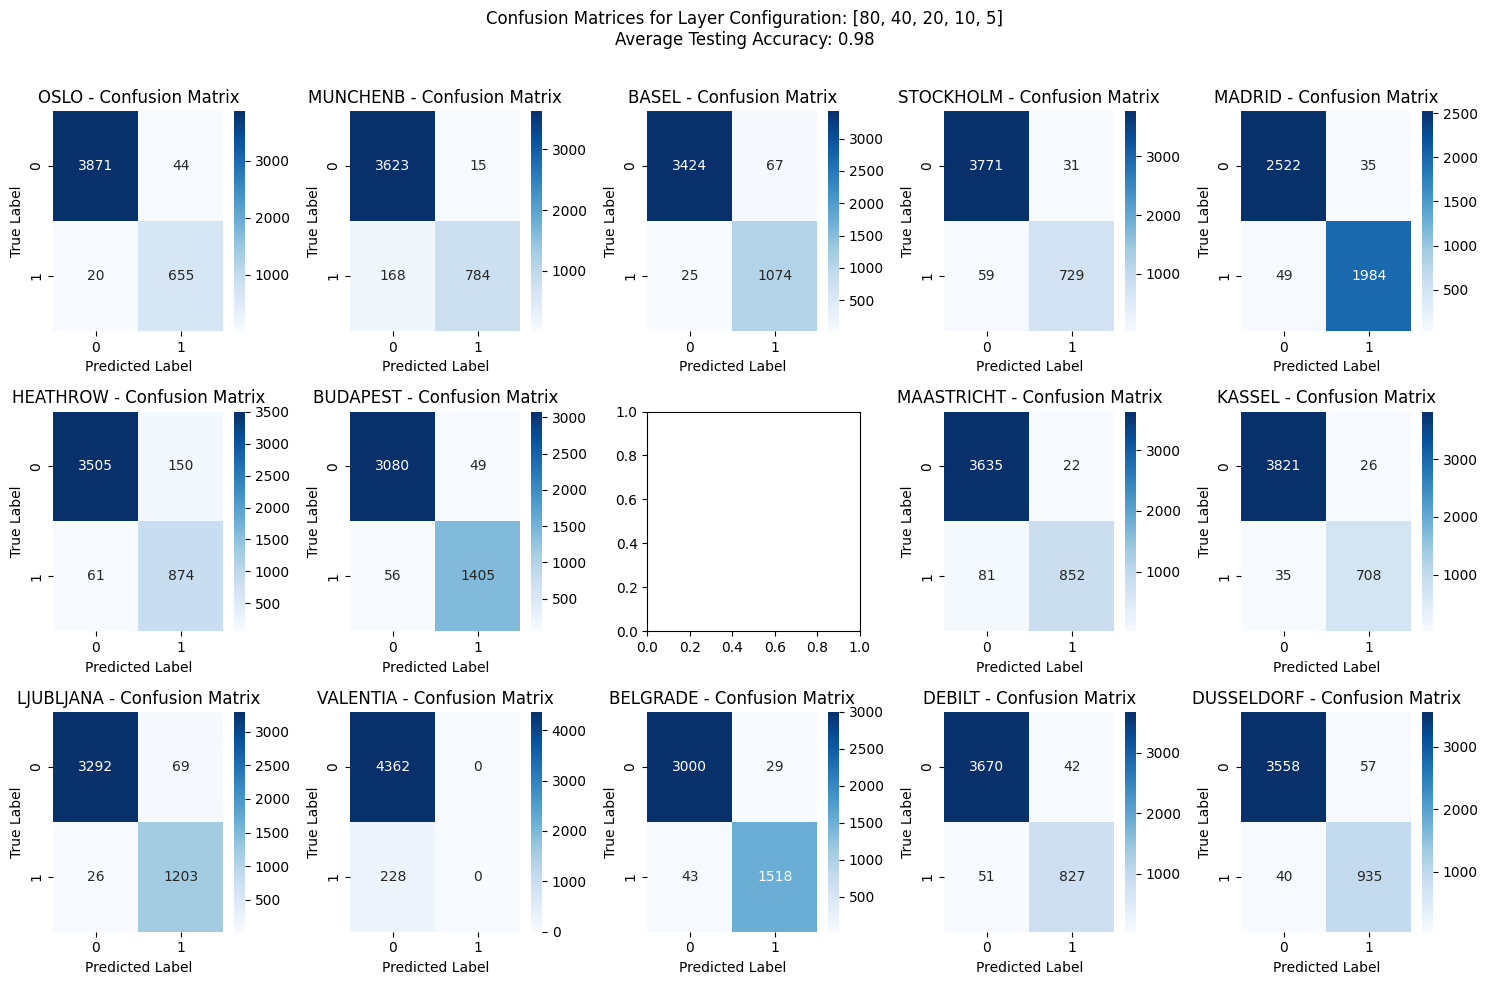


Layer Configuration: [50, 25, 10, 10]
OSLO - Training Accuracy: 0.98, Testing Accuracy: 0.98
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.98, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.99, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.98
LJUBLJANA - Training Accuracy: 0.98, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.98, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.98
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.98, Testing Accuracy: 0.98


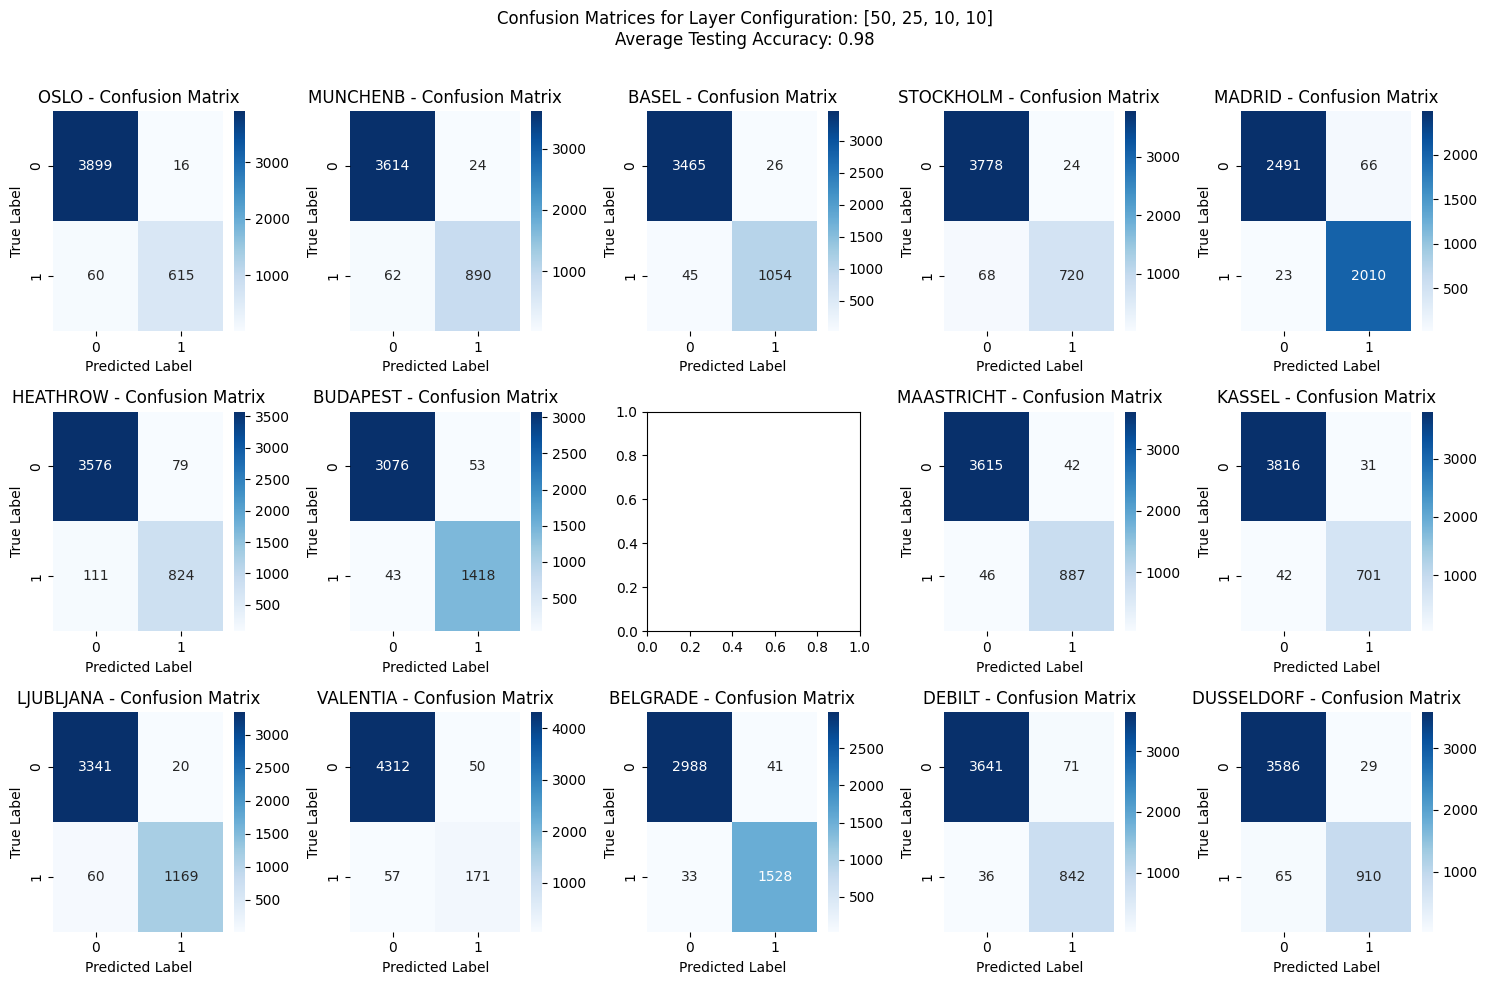


Layer Configuration: [100, 40, 30, 20, 15, 5]
OSLO - Training Accuracy: 0.99, Testing Accuracy: 0.99
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.99, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.95
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.99, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.98
LJUBLJANA - Training Accuracy: 0.98, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.98, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.99
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.99, Testing Accuracy: 0.98


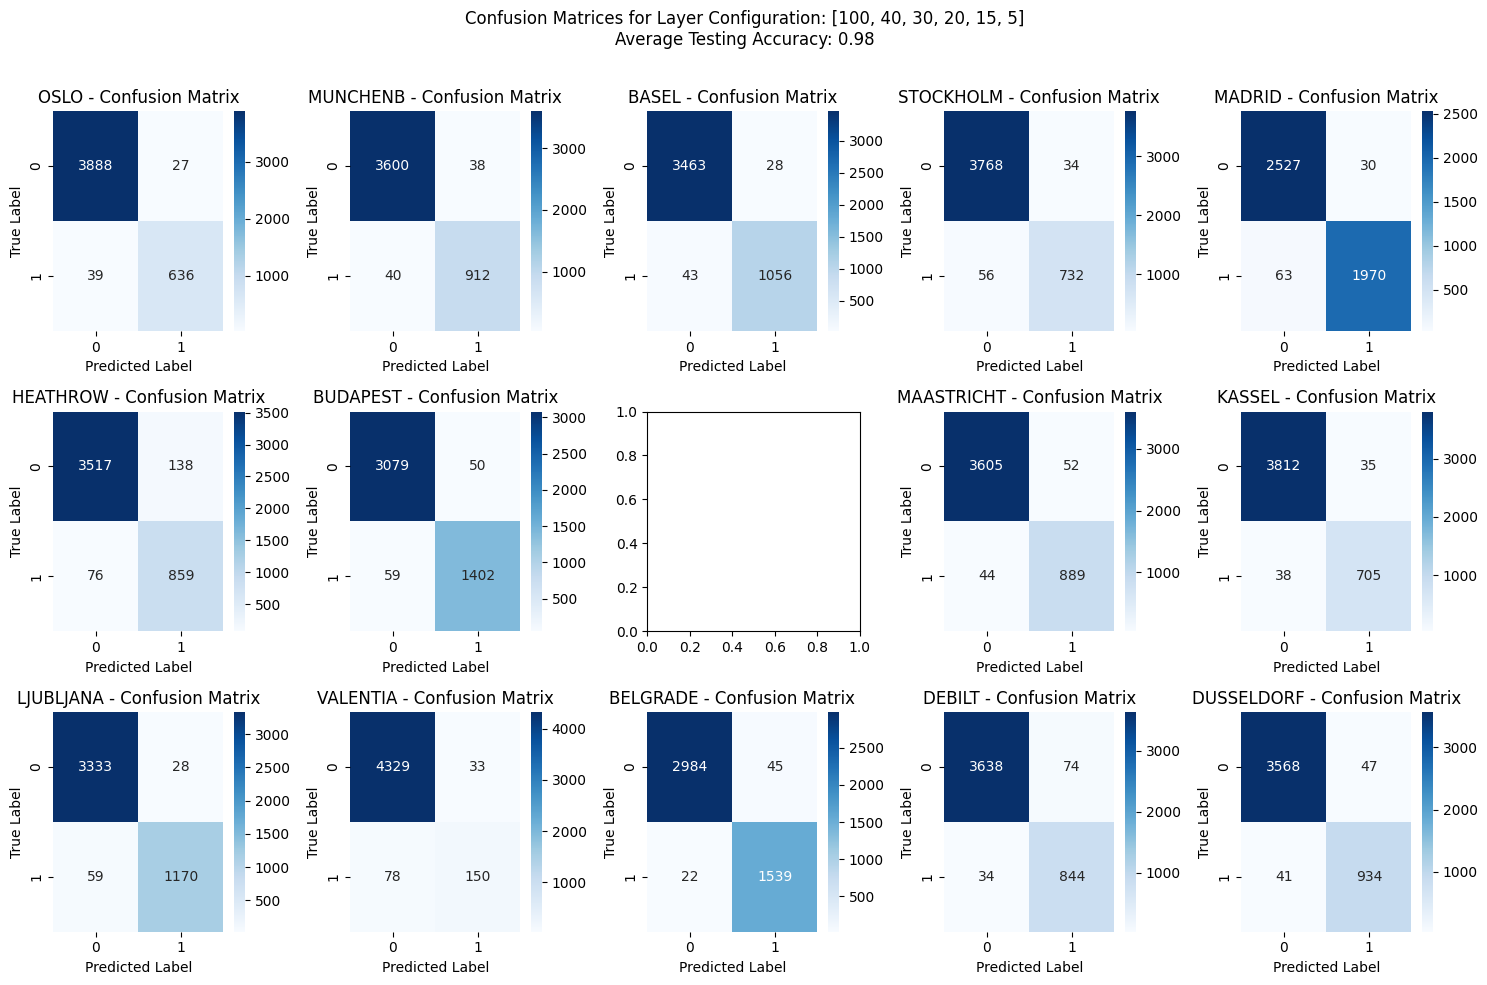


Layer Configuration: [50, 25, 15, 10, 10]
OSLO - Training Accuracy: 0.99, Testing Accuracy: 0.99
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.98, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.99, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.98
LJUBLJANA - Training Accuracy: 0.99, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.98, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.98
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.98, Testing Accuracy: 0.98


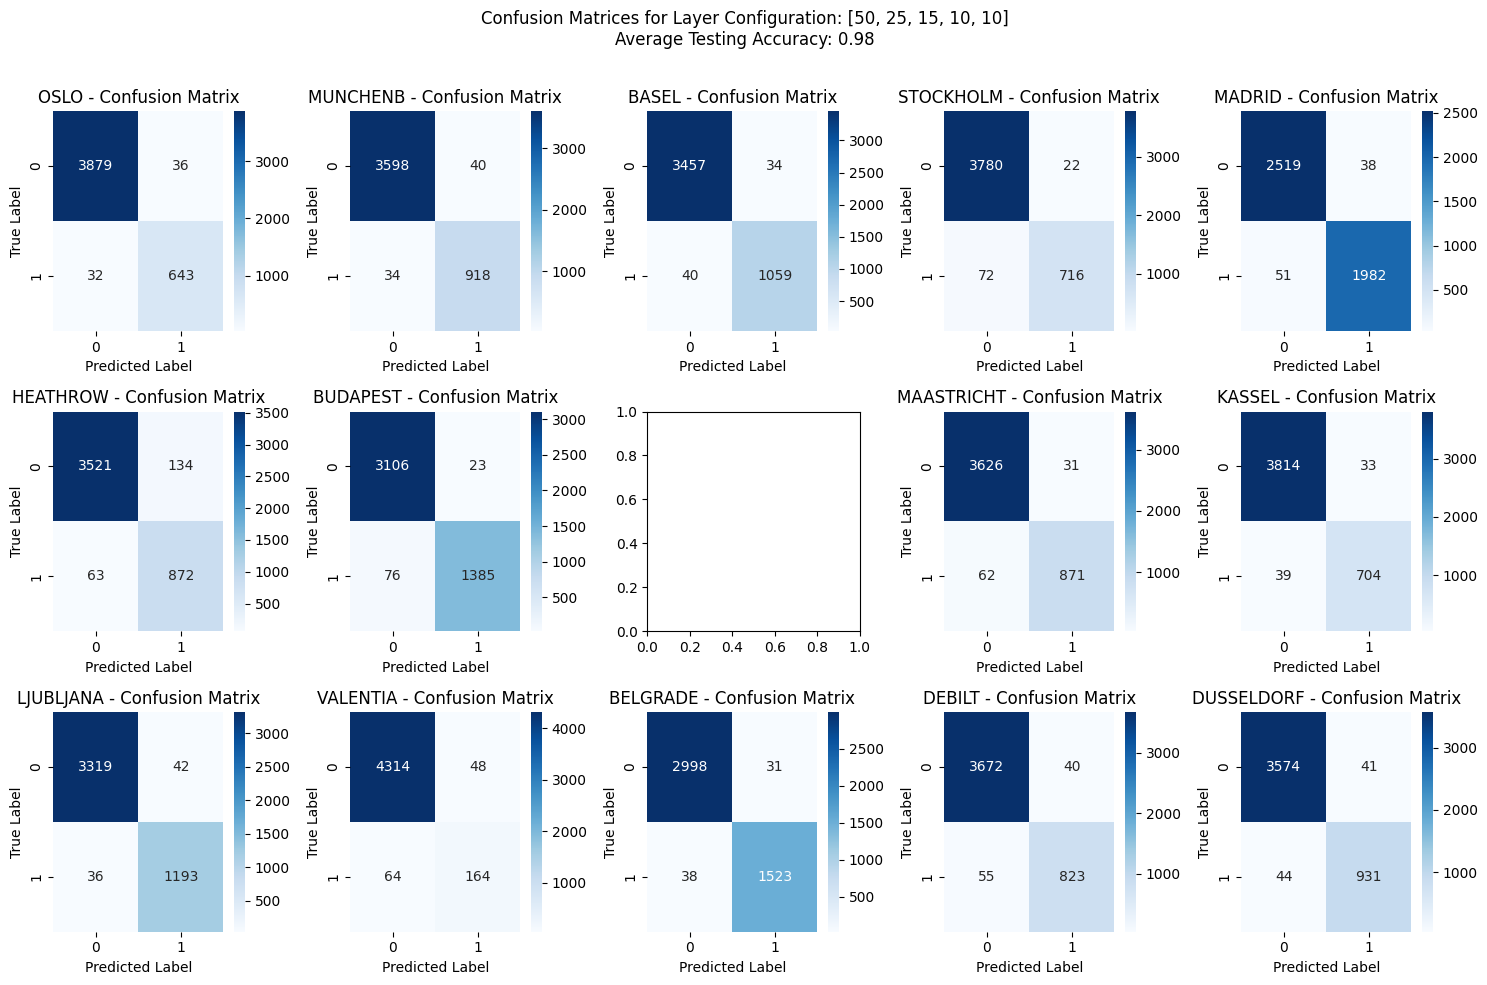


Layer Configuration: [50, 10, 5, 5]
OSLO - Training Accuracy: 0.99, Testing Accuracy: 0.99
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.98, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.98, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.99
LJUBLJANA - Training Accuracy: 0.98, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.98, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.99
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.98, Testing Accuracy: 0.98


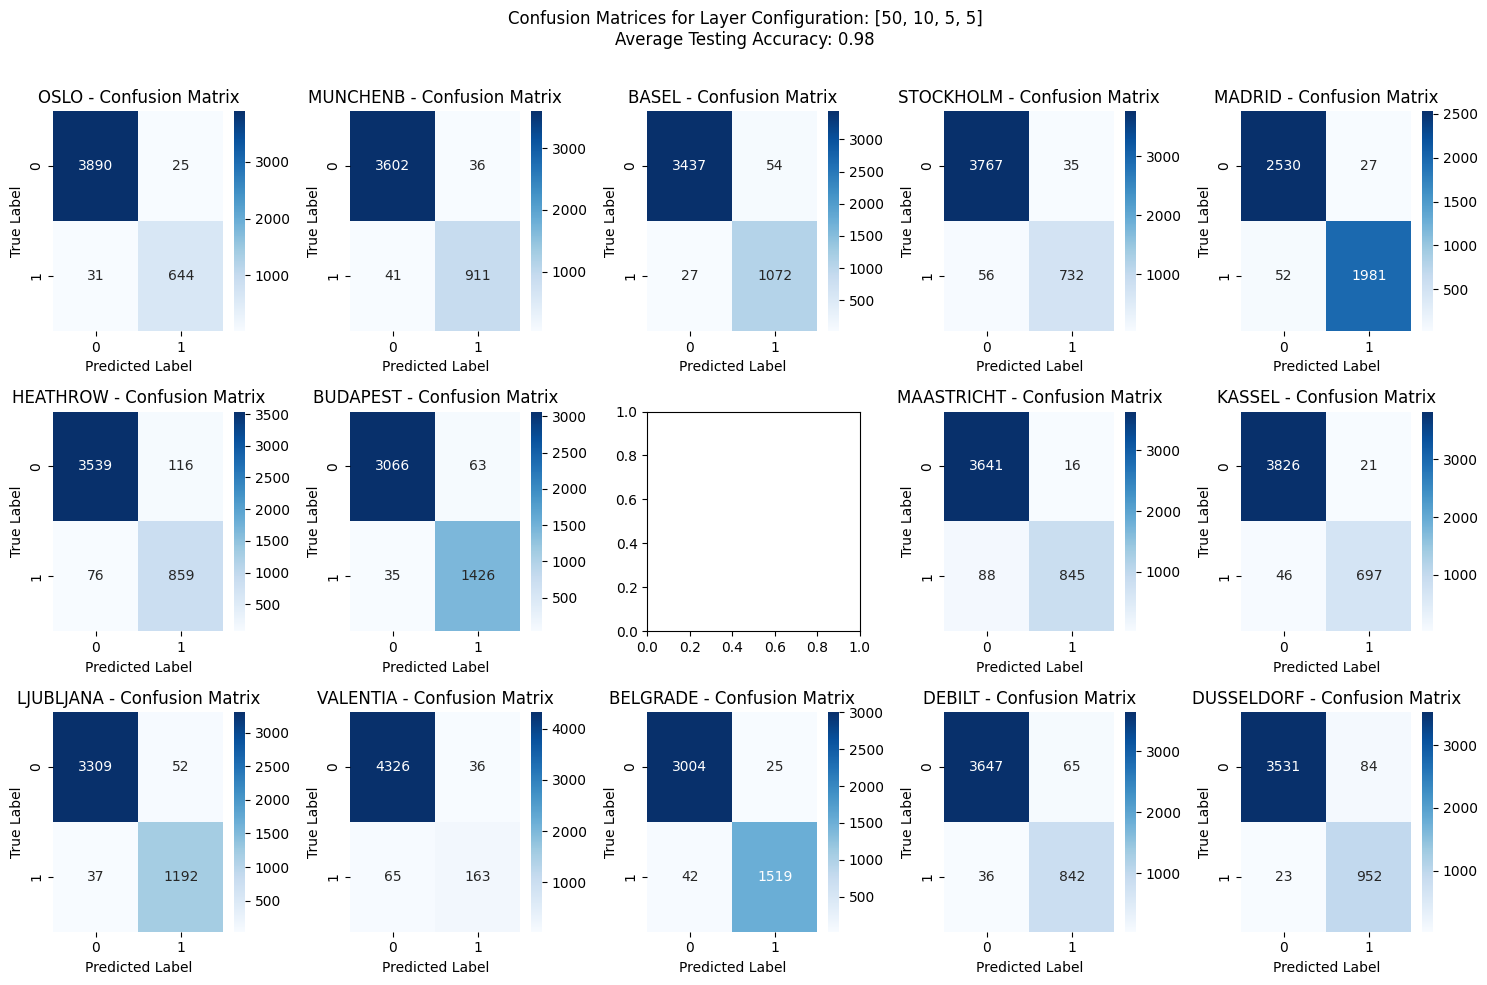


Layer Configuration: [50, 15, 10, 5]
OSLO - Training Accuracy: 0.99, Testing Accuracy: 0.99
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.98, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.99, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.99
LJUBLJANA - Training Accuracy: 0.99, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.98, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.98
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.98, Testing Accuracy: 0.98


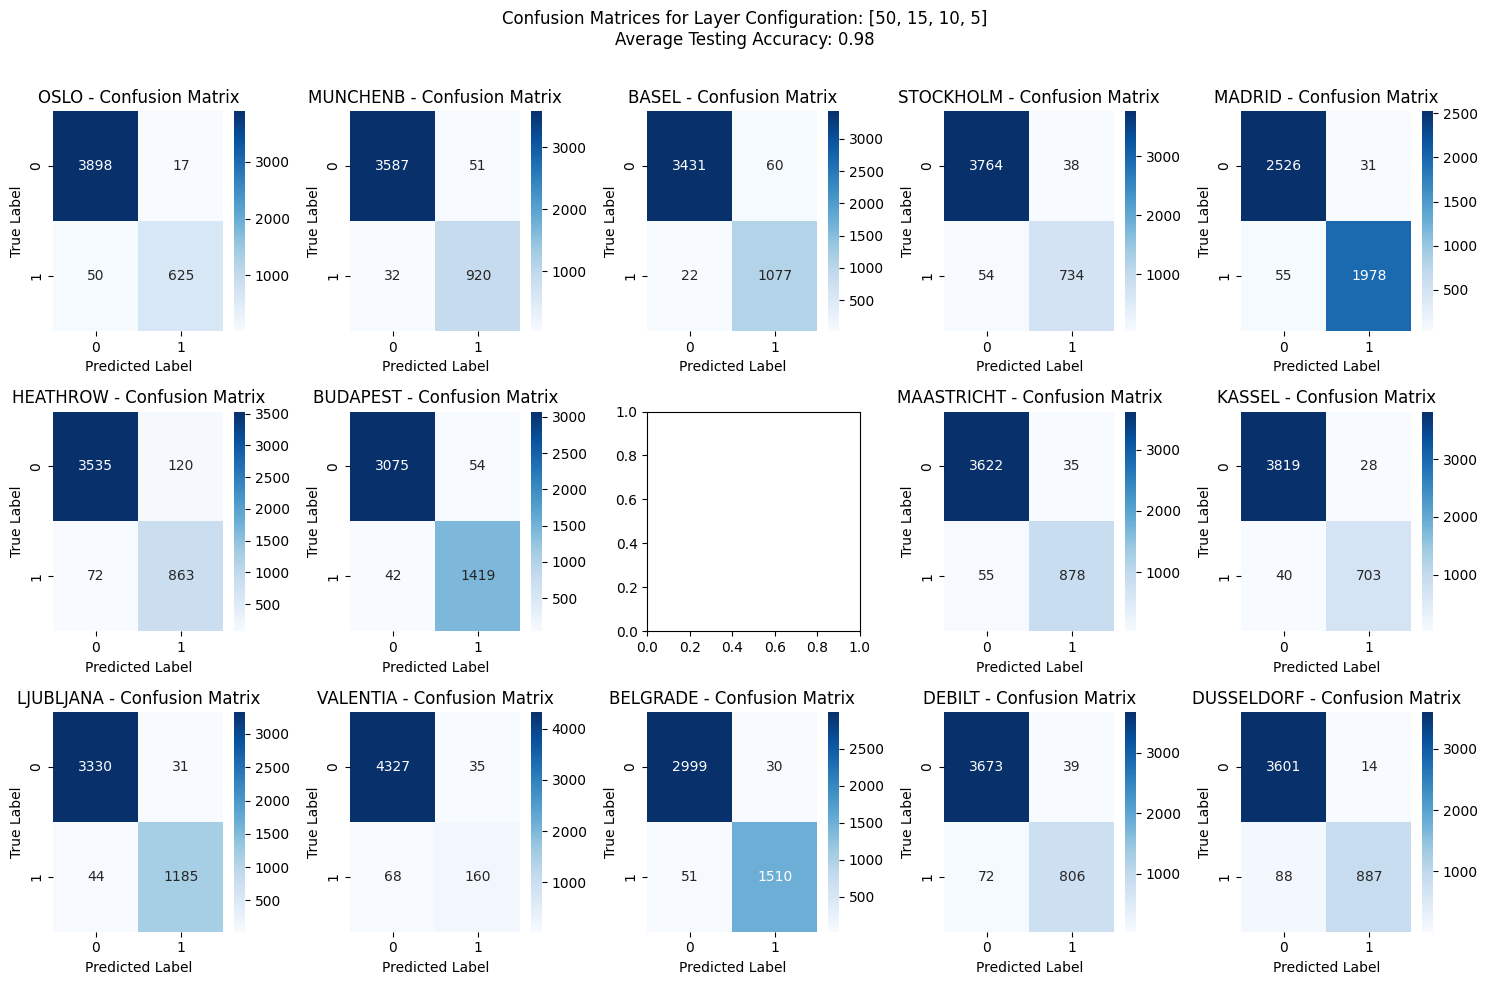


Layer Configuration: [30, 15, 10, 5, 5]
OSLO - Training Accuracy: 0.99, Testing Accuracy: 0.99
MUNCHENB - Training Accuracy: 0.98, Testing Accuracy: 0.98
BASEL - Training Accuracy: 0.98, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 0.99, Testing Accuracy: 0.98
MADRID - Training Accuracy: 0.98, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.98, Testing Accuracy: 0.98
SONNBLICK - Insufficient classes in the target variable. Skipping...
MAASTRICHT - Training Accuracy: 0.98, Testing Accuracy: 0.98
KASSEL - Training Accuracy: 0.99, Testing Accuracy: 0.99
LJUBLJANA - Training Accuracy: 0.98, Testing Accuracy: 0.98
VALENTIA - Training Accuracy: 0.98, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 0.99, Testing Accuracy: 0.98
DEBILT - Training Accuracy: 0.98, Testing Accuracy: 0.98
DUSSELDORF - Training Accuracy: 0.98, Testing Accuracy: 0.98


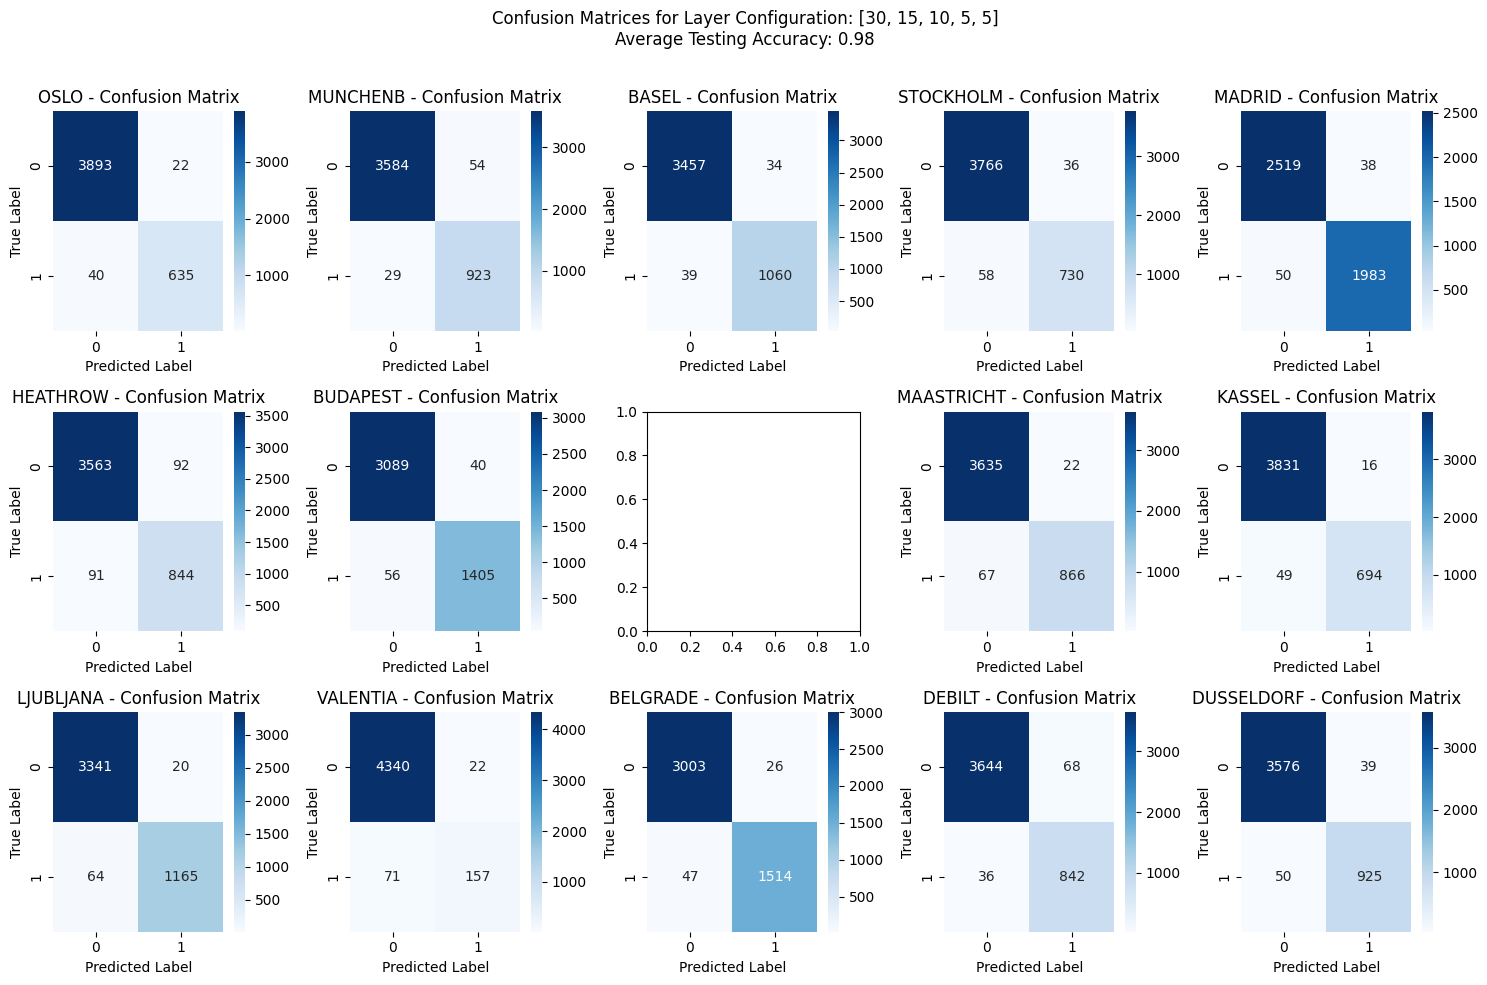


Best Average Testing Accuracy: 0.98 for Layer Configuration: [30, 15, 10, 5, 5]


In [17]:
layers = [[100, 30, 10], [80, 40, 10], [100, 40, 20, 10], [100, 60, 40, 20, 5], [80, 40, 20, 10, 5], [50, 25, 10, 10], [100, 40, 30, 20, 15, 5], [50, 25, 15, 10, 10], 
        [50, 10, 5, 5], [50, 15, 10, 5], [30, 15, 10, 5, 5]]

best_average_accuracy = 0
best_layer_config = None

#Applying the ANN model for each layer and each city

for layer_config in layers:
    print(f'\nLayer Configuration: {layer_config}')
    fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Adjust the size as needed
    average_accuracy = 0  
    valid_city_count = 0  

    for i, city in enumerate(cities):
        X_columns = [col for col in df_scaled_weather.columns if city in col]
        X = df_scaled_weather[X_columns]

        # Select the corresponding column from df_answers
        y_column = f'{city}_pleasant_weather'
        y = df_answers[y_column]

        # Check if there are at least two unique values in the target variable
        if len(y.unique()) < 2:
            print(f'{city} - Insufficient classes in the target variable. Skipping...')
            continue

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create an ANN model with the current layer configuration
        mlp = MLPClassifier(hidden_layer_sizes=layer_config, max_iter=800, tol=0.0001)

        mlp.fit(X_train, y_train)

        y_pred_test = mlp.predict(X_test)

        accuracy_train = accuracy_score(mlp.predict(X_train), y_train)
        accuracy_test = accuracy_score(y_pred_test, y_test)

        print(f'{city} - Training Accuracy: {accuracy_train:.2f}, Testing Accuracy: {accuracy_test:.2f}')

        # Confusion matrix for testing data
        conf_matrix = confusion_matrix(y_test, y_pred_test)

        # Visualize the confusion matrix as a heatmap on the corresponding subplot
        row, col = divmod(i, 5)
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"], ax=axes[row, col])
        axes[row, col].set_title(f'{city} - Confusion Matrix')
        axes[row, col].set_xlabel('Predicted Label')
        axes[row, col].set_ylabel('True Label')

        average_accuracy += accuracy_test
        valid_city_count += 1

    # Calculate the average accuracy for the current layer configuration
    if valid_city_count > 0:
        average_accuracy /= valid_city_count

        # Check if the current layer configuration has a higher average accuracy
        if average_accuracy > best_average_accuracy:
            best_average_accuracy = average_accuracy
            best_layer_config = layer_config

        plt.suptitle(f'Confusion Matrices for Layer Configuration: {layer_config}\nAverage Testing Accuracy: {average_accuracy:.2f}')
        plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust subplot layout
        plt.show()

print(f'\nBest Average Testing Accuracy: {best_average_accuracy:.2f} for Layer Configuration: {best_layer_config}')
